In [767]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [768]:
data = pd.read_csv('/workspaces/wiggle-face/data/panda_each_video/all_panda_features_updated.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285001 entries, 0 to 1285000
Data columns (total 34 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   infant_id                                             1285001 non-null  int64  
 1   date                                                  448436 non-null   float64
 2   cam                                                   448436 non-null   float64
 3   frame_id                                              1285001 non-null  int64  
 4   right_brow_mean_y                                     1285001 non-null  float64
 5   left_brow_mean_y                                      1285001 non-null  float64
 6   right_eye_distance                                    1285001 non-null  float64
 7   left_eye_distance                                     1285001 non-null  float64
 8   lips_distance                   

In [769]:
def remove_outliers(column):
    mean = column.mean()
    std = column.std()
    return column[(column >= mean - 3 * std) & (column <= mean + 3 * std)]

# Define your conditions
conditions = (
    (data['right_brow_mean_y'] >= 0.6) & (data['left_brow_mean_y'] >= 0.6) 
)
eye_width_condition = abs(data['right_eye_width'] - data['left_eye_width']) <= 0.1
eyebrow_width_condition = abs(data['right_eyebrow_width'] - data['left_eyebrow_width']) <= 0.2

# Apply the conditions
data = data[eye_width_condition & eyebrow_width_condition & conditions]

# Apply the remove_outliers function to all columns except 'infant_id'
columns_to_apply = data.columns.difference(['infant_id', 'frame_id', 'date', 'cam', 'age'])
data[columns_to_apply] = data[columns_to_apply].apply(remove_outliers)

# Reset the index and display info
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376517 entries, 0 to 376516
Data columns (total 34 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   infant_id                                             376517 non-null  int64  
 1   date                                                  105860 non-null  float64
 2   cam                                                   105860 non-null  float64
 3   frame_id                                              376517 non-null  int64  
 4   right_brow_mean_y                                     364227 non-null  float64
 5   left_brow_mean_y                                      364111 non-null  float64
 6   right_eye_distance                                    370698 non-null  float64
 7   left_eye_distance                                     371537 non-null  float64
 8   lips_distance                               

In [770]:
features = data.drop(columns=['infant_id', 'frame_id','date', 'cam', 'age'])
features

,right_brow_mean_y,left_brow_mean_y,right_eye_distance,left_eye_distance,lips_distance,left_eye_width,right_eye_width,left_eyebrow_width,right_eyebrow_width,lip_width,...,curvature_upper_left_brow,curvature_lower_left_brow,curvature_upper_left_eyelid,curvature_lower_left_eyelid,curvature_upper_right_eyelid,curvature_lower_right_eyelid,curvature_upper_outer_lip,curvature_lower_outer_lip,curvature_upper_inner_lip,curvature_lower_inner_lip
0,0.901760,0.843465,0.175058,0.185739,0.012644,0.506678,0.430091,0.752716,0.589096,0.670905,...,1.188671,0.636778,2.426133,1.263844,3.026428,1.562662,1.651708,1.932361,0.709494,0.245691
1,0.904089,0.851144,0.171311,0.181891,0.012543,0.508100,0.432293,0.745538,0.589904,0.664504,...,1.144263,0.631421,2.348470,1.275923,2.876486,1.577599,1.705647,1.991199,0.798197,0.028191
2,0.904192,0.868161,0.168297,0.178532,0.010381,0.498225,0.436430,0.754410,0.603837,0.679178,...,1.144648,0.562679,2.462608,1.345827,2.864451,1.588496,1.589688,1.925304,0.691536,0.021022
3,0.905433,0.889612,0.169986,0.175811,0.014533,0.490042,0.435499,0.741015,0.612841,0.658556,...,1.143823,0.677388,2.440670,1.193029,2.818799,1.686506,1.631812,2.473867,0.681219,0.028492
4,0.906771,0.898333,0.166822,0.172554,0.014203,0.486693,0.439863,0.728618,0.630383,0.670369,...,1.136115,0.663472,2.459143,1.375841,2.856202,1.467293,1.646472,1.827424,0.573086,0.120349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376512,0.848193,0.913853,0.100685,0.102096,0.081462,0.429777,0.499511,0.659189,0.765695,0.834792,...,1.179181,0.527772,2.508937,0.973699,1.833898,0.587129,1.626692,2.017898,0.670633,0.111385
376513,0.855153,0.913840,0.100185,0.100880,0.071267,0.438075,0.501575,0.647658,0.774488,0.833815,...,1.260172,0.479811,2.324102,1.052985,1.810921,0.828961,1.655888,2.142543,0.742374,0.037999
376514,0.854011,0.913481,0.088770,0.095622,0.057389,0.431408,0.498334,0.622322,0.784381,0.803948,...,1.298232,0.561585,2.120950,1.064636,1.640011,0.651165,1.755654,2.401272,0.702675,0.058855
376515,0.817609,0.918534,0.036804,0.053795,0.007079,0.441644,0.524365,0.611447,0.760014,0.855597,...,1.124091,0.442024,1.068734,0.561111,NaN,0.527072,1.131441,2.202350,0.151430,0.000006


In [771]:
missing_indices = features[features.isna().any(axis=1)].index

# Drop these rows from both features and data
features.dropna(inplace=True)
features = features.reset_index(drop=True)
data.drop(index=missing_indices, inplace=True)
data = data.reset_index(drop=True)

features

,right_brow_mean_y,left_brow_mean_y,right_eye_distance,left_eye_distance,lips_distance,left_eye_width,right_eye_width,left_eyebrow_width,right_eyebrow_width,lip_width,...,curvature_upper_left_brow,curvature_lower_left_brow,curvature_upper_left_eyelid,curvature_lower_left_eyelid,curvature_upper_right_eyelid,curvature_lower_right_eyelid,curvature_upper_outer_lip,curvature_lower_outer_lip,curvature_upper_inner_lip,curvature_lower_inner_lip
0,0.901760,0.843465,0.175058,0.185739,0.012644,0.506678,0.430091,0.752716,0.589096,0.670905,...,1.188671,0.636778,2.426133,1.263844,3.026428,1.562662,1.651708,1.932361,0.709494,0.245691
1,0.904089,0.851144,0.171311,0.181891,0.012543,0.508100,0.432293,0.745538,0.589904,0.664504,...,1.144263,0.631421,2.348470,1.275923,2.876486,1.577599,1.705647,1.991199,0.798197,0.028191
2,0.904192,0.868161,0.168297,0.178532,0.010381,0.498225,0.436430,0.754410,0.603837,0.679178,...,1.144648,0.562679,2.462608,1.345827,2.864451,1.588496,1.589688,1.925304,0.691536,0.021022
3,0.905433,0.889612,0.169986,0.175811,0.014533,0.490042,0.435499,0.741015,0.612841,0.658556,...,1.143823,0.677388,2.440670,1.193029,2.818799,1.686506,1.631812,2.473867,0.681219,0.028492
4,0.906771,0.898333,0.166822,0.172554,0.014203,0.486693,0.439863,0.728618,0.630383,0.670369,...,1.136115,0.663472,2.459143,1.375841,2.856202,1.467293,1.646472,1.827424,0.573086,0.120349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327542,0.892634,0.915112,0.089981,0.099848,0.042610,0.439916,0.481018,0.639860,0.725511,0.821663,...,1.354051,0.562181,2.188411,0.971543,1.816524,1.068976,1.324724,2.468606,0.511619,0.143623
327543,0.867385,0.910657,0.090284,0.096727,0.038309,0.423761,0.487104,0.605050,0.742010,0.814588,...,1.470873,0.685606,2.330060,0.747522,1.721391,1.064619,1.486834,2.484279,0.525853,0.047274
327544,0.848193,0.913853,0.100685,0.102096,0.081462,0.429777,0.499511,0.659189,0.765695,0.834792,...,1.179181,0.527772,2.508937,0.973699,1.833898,0.587129,1.626692,2.017898,0.670633,0.111385
327545,0.855153,0.913840,0.100185,0.100880,0.071267,0.438075,0.501575,0.647658,0.774488,0.833815,...,1.260172,0.479811,2.324102,1.052985,1.810921,0.828961,1.655888,2.142543,0.742374,0.037999


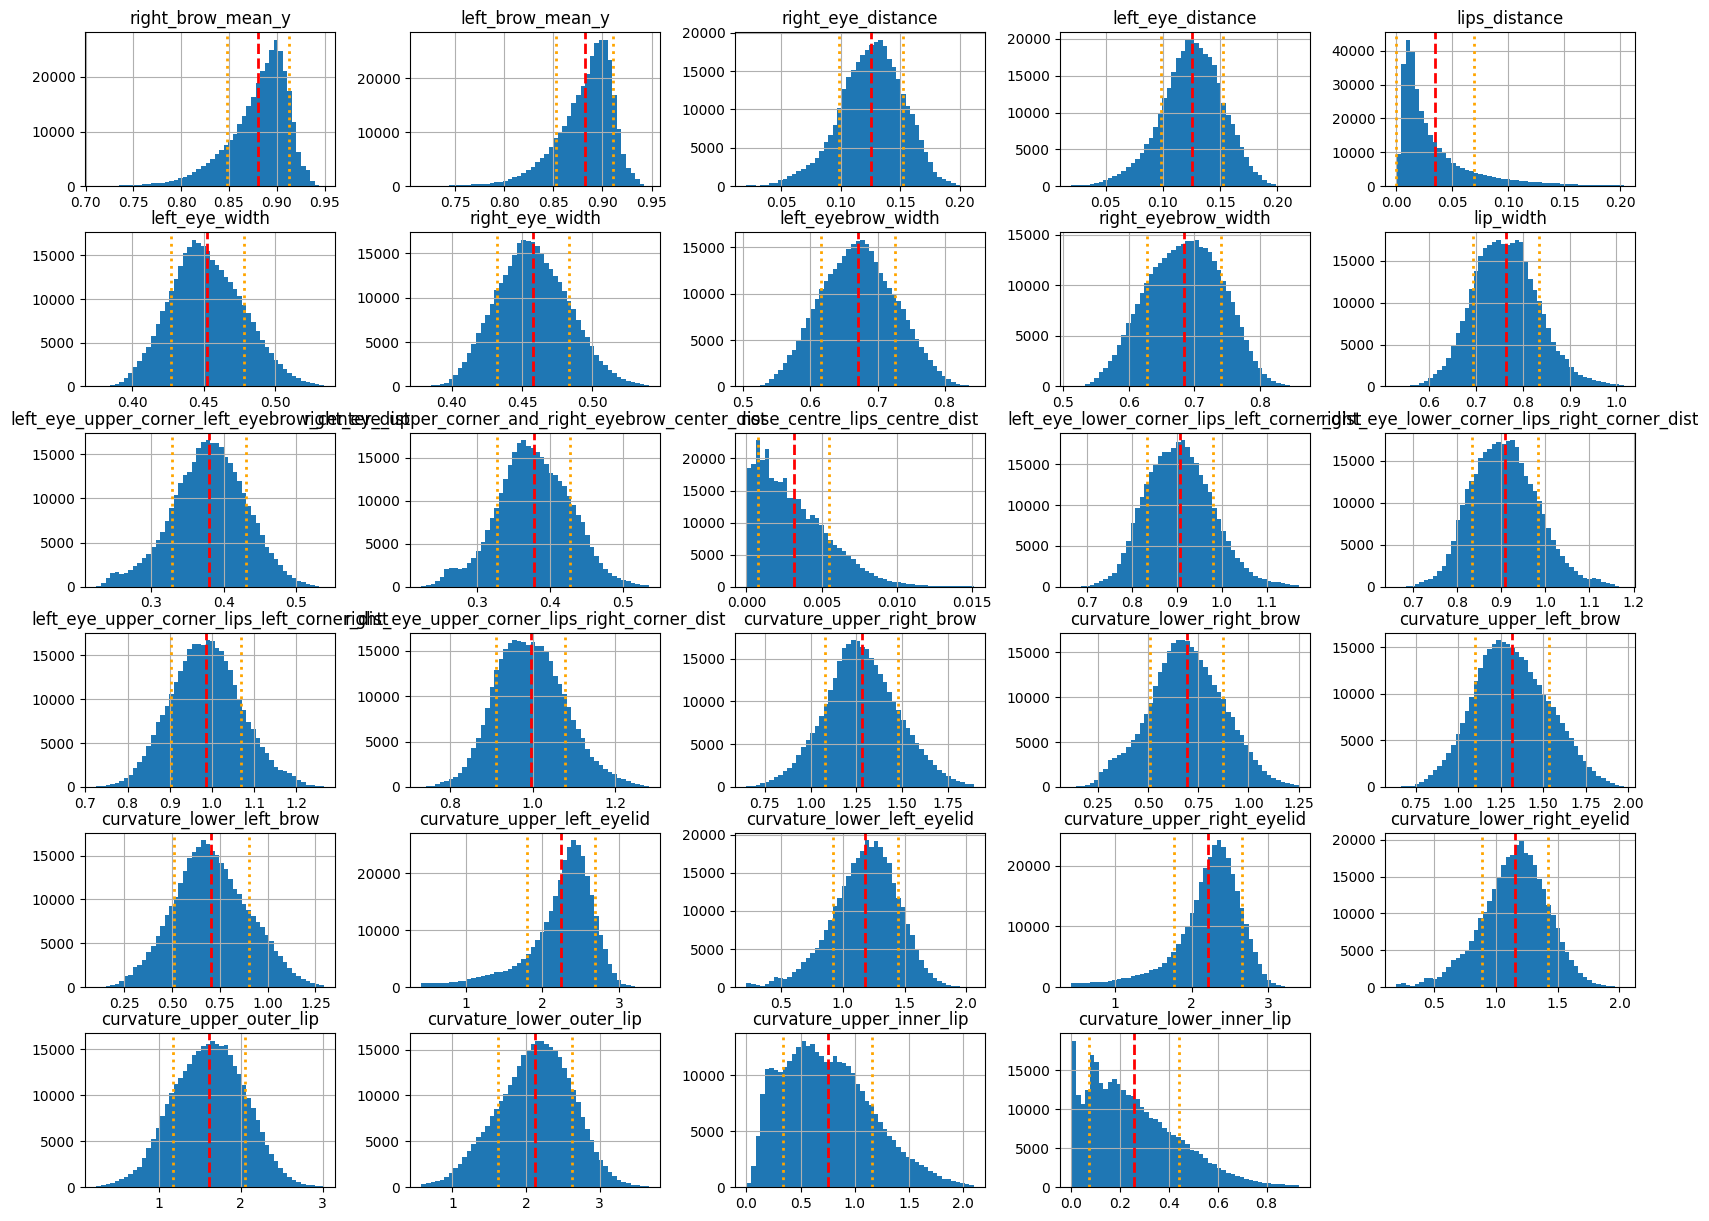

In [772]:
features.hist(bins=50, figsize=(20, 15))

# Calculate the mean and standard deviation for each feature and plot them
for feature in features.columns:
    mean = features[feature].mean()
    std = features[feature].std()
    
    # Get current subplot
    ax = plt.gcf().get_axes()[features.columns.get_loc(feature)]
    
    # Plot the mean line
    ax.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    # Plot the standard deviation lines
    ax.axvline(mean - std, color='orange', linestyle='dotted', linewidth=2)
    ax.axvline(mean + std, color='orange', linestyle='dotted', linewidth=2)
    
plt.show()

In [773]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327547 entries, 0 to 327546
Data columns (total 29 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   right_brow_mean_y                                     327547 non-null  float64
 1   left_brow_mean_y                                      327547 non-null  float64
 2   right_eye_distance                                    327547 non-null  float64
 3   left_eye_distance                                     327547 non-null  float64
 4   lips_distance                                         327547 non-null  float64
 5   left_eye_width                                        327547 non-null  float64
 6   right_eye_width                                       327547 non-null  float64
 7   left_eyebrow_width                                    327547 non-null  float64
 8   right_eyebrow_width                         

In [774]:
mask_1 = (features['right_eye_distance'] >= 0.15) & (features['left_eye_distance'] >= 0.15)
mask_2 = features['right_eye_distance'].between(0.125, 0.15) & features['left_eye_distance'].between(0.125, 0.15)
mask_2_1 = features['right_eye_distance'].between(0.08, 0.12) & features['left_eye_distance'].between(0.08, 0.12)
mask_3 = (features['right_eye_distance'] <= 0.08) & (features['left_eye_distance'] <= 0.08)

mask_4 = ((features['left_brow_mean_y'] >= 0.9) & (features['right_brow_mean_y'] >= 0.9)) | ((features['left_eye_upper_corner_left_eyebrow_center_dist'] > 0.42) & (features['right_eye_upper_corner_and_right_eyebrow_center_dist'] > 0.42))
mask_4_1 = ((features['left_eye_upper_corner_left_eyebrow_center_dist'] < 0.33) & (features['right_eye_upper_corner_and_right_eyebrow_center_dist'] < 0.33))
mask_5 = ((features['curvature_lower_left_brow'] > 0.8) & (features['curvature_upper_left_brow'] > 1.35)) | ((features['curvature_lower_right_brow'] > 0.8) & (features['curvature_upper_right_brow'] > 1.35))
mask_5_1 = ((features['curvature_lower_left_brow'].between(0.6, 0.8)) & (features['curvature_upper_left_brow'].between(1,1.35))) & ((features['curvature_lower_right_brow'].between(0.6,0.8)) & (features['curvature_upper_right_brow'] .between(1,1.35)))
mask_6 = ((features['curvature_lower_left_brow'] < 0.5) & (features['curvature_upper_left_brow'] < 1)) | ((features['curvature_lower_right_brow'] < 0.5) & (features['curvature_upper_right_brow'] < 1))

mask_7 = features['lips_distance'] > 0.03
mask_8 = (features['curvature_upper_outer_lip'] > 1.75) & (features['curvature_lower_outer_lip'] > 2.3) & (features['lip_width'] < 0.8) & mask_7
mask_9 = features['lip_width'] >= 0.77
mask_10 = (features['curvature_lower_outer_lip'] > 2.17) 
mask_10_2 = ((features['left_eye_upper_corner_lips_left_corner_dist'] < 0.89) | (features['right_eye_upper_corner_lips_right_corner_dist'] < 0.89)) & ((features['left_eye_lower_corner_lips_left_corner_dist'] < 0.83) | (features['right_eye_lower_corner_lips_right_corner_dist'] < 0.83) )
mask_11 = (features['curvature_upper_outer_lip'] > 1.75) & (features['curvature_lower_outer_lip'] > 1.5)
mask_11_2 = (features['left_eye_upper_corner_lips_left_corner_dist'] > 1.07) | (features['right_eye_upper_corner_lips_right_corner_dist'] > 1.07) | (features['left_eye_lower_corner_lips_left_corner_dist'] > 0.97) | (features['right_eye_lower_corner_lips_right_corner_dist'] > 0.97)

mask_12 = ((features['curvature_lower_inner_lip'] <0.2) & (features['curvature_upper_outer_lip'] > 1.8)) | ((features['curvature_upper_inner_lip'] <0.5) & (features['curvature_lower_outer_lip'] > 2.3) )
mask_13 = mask_7 & (features['lip_width'] >= 0.8)

features['eyes_wide_open'] = mask_1
features['eyes_widened'] = mask_2
features['eyes_narrowed'] = mask_2_1
features['eyes_closed'] = mask_3

features['brows_raised'] = mask_4
features['brows_lowered'] = mask_4_1
features['brows_arched'] = mask_5
features['brows_normal'] = mask_5_1
features['brows_flat'] = mask_6

features['mouth_open'] = mask_7
features['mouth_gaping'] = mask_8
features['mouth_widened'] = mask_9
features['mouth_upturned'] = mask_10_2 & mask_10
features['mouth_bow'] = mask_12

features['mouth_downturned'] = mask_11_2 #& mask_11
# features['mouth_corners_down'] = mask_11_2

features['mouth_neutral'] = ~(mask_10_2) & ~(mask_11_2)
features['mouth_squared'] = mask_13

col_to_drop = [ 'right_eye_upper_corner_and_right_eyebrow_center_dist',
    'lips_distance', 'curvature_upper_outer_lip', 'curvature_lower_outer_lip', 'lip_width', 
    'left_eye_upper_corner_lips_left_corner_dist', 'right_eye_upper_corner_lips_right_corner_dist',
    'curvature_upper_inner_lip', 'curvature_lower_inner_lip', 'left_eye_lower_corner_lips_left_corner_dist', 
    'right_eye_lower_corner_lips_right_corner_dist', 'left_brow_mean_y', 'right_brow_mean_y',
    'left_eye_upper_corner_left_eyebrow_center_dist', 'curvature_lower_left_brow', 
    'curvature_lower_right_brow', 'curvature_upper_left_brow', 'curvature_upper_right_brow',
    'right_eye_distance', 'left_eye_distance', 'nose_centre_lips_centre_dist', 'left_eye_width', 'right_eye_width', 'left_eyebrow_width', 'right_eyebrow_width',
    'curvature_upper_left_eyelid', 'curvature_lower_left_eyelid', 'curvature_upper_right_eyelid', 'curvature_lower_right_eyelid'
]

features = features.drop(columns= col_to_drop).reset_index(drop=True)

In [775]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327547 entries, 0 to 327546
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   eyes_wide_open    327547 non-null  bool 
 1   eyes_widened      327547 non-null  bool 
 2   eyes_narrowed     327547 non-null  bool 
 3   eyes_closed       327547 non-null  bool 
 4   brows_raised      327547 non-null  bool 
 5   brows_lowered     327547 non-null  bool 
 6   brows_arched      327547 non-null  bool 
 7   brows_normal      327547 non-null  bool 
 8   brows_flat        327547 non-null  bool 
 9   mouth_open        327547 non-null  bool 
 10  mouth_gaping      327547 non-null  bool 
 11  mouth_widened     327547 non-null  bool 
 12  mouth_upturned    327547 non-null  bool 
 13  mouth_bow         327547 non-null  bool 
 14  mouth_downturned  327547 non-null  bool 
 15  mouth_neutral     327547 non-null  bool 
 16  mouth_squared     327547 non-null  bool 
dtypes: bool(17

In [776]:
count_true_false = features.apply(pd.value_counts).fillna(0).astype(int)
count_true_false

,eyes_wide_open,eyes_widened,eyes_narrowed,eyes_closed,brows_raised,brows_lowered,brows_arched,brows_normal,brows_flat,mouth_open,mouth_gaping,mouth_widened,mouth_upturned,mouth_bow,mouth_downturned,mouth_neutral,mouth_squared
False,278490,240025,232108,313307,245162,288299,201260,303544,302237,204268,273962,179086,313450,264864,240046,127132,297269
True,49057,87522,95439,14240,82385,39248,126287,24003,25310,123279,53585,148461,14097,62683,87501,200415,30278


In [777]:
features['sleepy'] =  (features['eyes_closed']) & features['mouth_neutral'] 
features['playful'] = features['eyes_narrowed'] & (features['mouth_widened']) & features['mouth_upturned'] 
features['surprise'] = (features['eyes_wide_open'] | features['eyes_widened']) & features['brows_raised'] & (features['brows_arched']) & (features['mouth_gaping'] | features['mouth_open'])
features['interest'] = (features['eyes_wide_open'] | features['eyes_widened']) & features['brows_raised'] & ((features['mouth_bow'] | features['mouth_open']))
features['anger'] = (features['eyes_narrowed'] | features['eyes_closed']) & (features['brows_lowered']) & features['mouth_squared']
features['aversion'] = (features['eyes_narrowed']) & (features['mouth_downturned']) & ~features['mouth_open']
features['sadness'] = (features['eyes_narrowed']) & (features['mouth_downturned']) 

features['anger']  = features['anger'] 
features['aversion'] = features['aversion'] & ~features['anger'] 
features['sadness'] = features['sadness'] & ~features['anger'] & ~features['aversion'] 
features['negative'] = (features['aversion'] | features['sadness'] | features['anger']) 

features['playful'] = features['playful'] & ~features['negative']  & ~features['sleepy']
features['surprise'] = features['surprise'] & ~features['playful'] & ~features['negative'] 
features['interest'] = features['interest'] & ~features['surprise'] & ~features['playful'] & ~features['negative'] 
features['positive'] = features['interest'] | features['surprise'] | features['playful'] & ~features['negative'] 

features['neutral'] =  ~((features['brows_raised']) | features['brows_lowered']) & (features['mouth_neutral']) & ~features['positive'] & ~features['negative'] 
features['sleepy'] = features['sleepy'] & ~(features['positive'] | features['negative'] | features['neutral'])

In [778]:
data['sleepy'] = features['sleepy'] 
data['playful'] = features['playful']
data['surprise'] = features['surprise']
data['interest'] = features['interest'] 

data['anger'] = features['anger'] 
data['aversion'] = features['aversion'] 
data['sadness'] = features['sadness'] 

data['negative'] = features['negative'] 
data['positive'] = features['positive'] 
data['neutral'] = features['neutral'] 


mask = features['positive'] | features['negative'] | features['neutral'] | features['sleepy']
features = features[mask]
data = data[mask]

features = features.reset_index(drop = True)
data = data.reset_index(drop = True)

features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173126 entries, 0 to 173125
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   eyes_wide_open    173126 non-null  bool 
 1   eyes_widened      173126 non-null  bool 
 2   eyes_narrowed     173126 non-null  bool 
 3   eyes_closed       173126 non-null  bool 
 4   brows_raised      173126 non-null  bool 
 5   brows_lowered     173126 non-null  bool 
 6   brows_arched      173126 non-null  bool 
 7   brows_normal      173126 non-null  bool 
 8   brows_flat        173126 non-null  bool 
 9   mouth_open        173126 non-null  bool 
 10  mouth_gaping      173126 non-null  bool 
 11  mouth_widened     173126 non-null  bool 
 12  mouth_upturned    173126 non-null  bool 
 13  mouth_bow         173126 non-null  bool 
 14  mouth_downturned  173126 non-null  bool 
 15  mouth_neutral     173126 non-null  bool 
 16  mouth_squared     173126 non-null  bool 
 17  sleepy    

In [779]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173126 entries, 0 to 173125
Data columns (total 44 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   infant_id                                             173126 non-null  int64  
 1   date                                                  42202 non-null   float64
 2   cam                                                   42202 non-null   float64
 3   frame_id                                              173126 non-null  int64  
 4   right_brow_mean_y                                     173126 non-null  float64
 5   left_brow_mean_y                                      173126 non-null  float64
 6   right_eye_distance                                    173126 non-null  float64
 7   left_eye_distance                                     173126 non-null  float64
 8   lips_distance                               

In [780]:
labels = features.drop(columns = ['eyes_wide_open', 'eyes_widened', 'eyes_narrowed', 'eyes_closed', 'brows_raised', 'brows_arched', 'brows_normal', 'brows_flat', 'mouth_open', 'mouth_gaping', 'mouth_widened', 'mouth_upturned', 'mouth_downturned', 'mouth_neutral','brows_lowered', 'mouth_bow', 'mouth_squared'])
#labels = features.drop(columns = ['eyes_wide_open', 'eyes_widened', 'eyes_narrowed', 'eyes_closed', 'brows_raised', 'brows_arched', 'brows_flat', 'mouth_open', 'mouth_gaping', 'mouth_widened', 'mouth_upturned', 'mouth_downturned', 'mouth_neutral'])

In [781]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173126 entries, 0 to 173125
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   sleepy    173126 non-null  bool 
 1   playful   173126 non-null  bool 
 2   surprise  173126 non-null  bool 
 3   interest  173126 non-null  bool 
 4   anger     173126 non-null  bool 
 5   aversion  173126 non-null  bool 
 6   sadness   173126 non-null  bool 
 7   negative  173126 non-null  bool 
 8   positive  173126 non-null  bool 
 9   neutral   173126 non-null  bool 
dtypes: bool(10)
memory usage: 1.7 MB


In [782]:
count_true_false = labels.apply(pd.value_counts)#.astype(int)
count_true_false

,sleepy,playful,surprise,interest,anger,aversion,sadness,negative,positive,neutral
False,170107,172081,165382,163789,171708,165776,163571,154803,155000,39468
True,3019,1045,7744,9337,1418,7350,9555,18323,18126,133658


In [783]:
labels['emotion_category'] = labels.apply(
    lambda row: 'positive' if row['positive'] else ('negative' if row['negative'] else ('neutral' if row['neutral'] else 'sleepy')), axis=1
)

labels['emotion'] = labels.apply(
    lambda row: 'interest' if row['interest'] else ('surprise' if row['surprise'] else ('playful' if row['playful'] else ('aversion' if row['aversion'] else ('sadness' if row['sadness'] else ('anger' if row['anger'] else ('neutral' if row['neutral'] else 'sleepy')))))) , axis=1
)

# Counting the number of each emotion and emotion_category
emotion_counts = labels['emotion'].value_counts()
emotion_category_counts = labels['emotion_category'].value_counts()

emotion_counts, emotion_category_counts

(neutral     133658
 sadness       9555
 interest      9337
 surprise      7744
 aversion      7350
 sleepy        3019
 anger         1418
 playful       1045
 Name: emotion, dtype: int64,
 neutral     133658
 negative     18323
 positive     18126
 sleepy        3019
 Name: emotion_category, dtype: int64)

In [784]:
# Visualizer
import cv2

data['emotion'] = labels['emotion']
data['emotion_category'] = labels['emotion_category']
selected_columns = ["infant_id", "frame_id","date","cam","emotion", "emotion_category"]
data_vis = data[selected_columns]
data_vis = data_vis.dropna()
data_vis = data_vis.reset_index(drop = True)

In [785]:
# Counting the number of each emotion and emotion_category
emotion_counts = data_vis['emotion'].value_counts()
emotion_category_counts = data_vis['emotion_category'].value_counts()
emotion_counts, emotion_category_counts

(neutral     33403
 interest     2641
 aversion     2586
 sleepy       1060
 sadness       994
 anger         864
 surprise      596
 playful        58
 Name: emotion, dtype: int64,
 neutral     33403
 negative     4444
 positive     3295
 sleepy       1060
 Name: emotion_category, dtype: int64)

In [786]:
data_vis = data_vis[data_vis['emotion'] == 'sleepy'].reset_index(drop = True)
# data_vis = data_vis.sample(n=800, random_state=42).reset_index(drop = True)
data_vis

,infant_id,frame_id,date,cam,emotion,emotion_category
0,29,1543,19233.0,3.0,sleepy,sleepy
1,29,1545,19233.0,3.0,sleepy,sleepy
2,29,1549,19233.0,3.0,sleepy,sleepy
3,29,1557,19233.0,3.0,sleepy,sleepy
4,29,1559,19233.0,3.0,sleepy,sleepy
...,...,...,...,...,...,...
1055,221,2920,19381.0,3.0,sleepy,sleepy
1056,221,3117,19381.0,3.0,sleepy,sleepy
1057,221,3153,19381.0,3.0,sleepy,sleepy
1058,221,3241,19381.0,3.0,sleepy,sleepy


In [787]:
def process_infant_id(infant_id):
    infant_id_str = str(int(infant_id))
    if len(infant_id_str) == 1:
        return '00' + infant_id_str
    elif len(infant_id_str) == 2:
        return '0' + infant_id_str
    else:
        return infant_id_str[-3:]

# Function to get the frame from the video
def get_frame(video_path, frame_number):
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    cap.release()
    if ret:
        return cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    else:
        print(f"Failed to extract frame {frame_number} from {video_path}")
        return None
    
# function to display a selected row
def display_row_panda_1_3(row_index, video_folder):
    if row_index < 0 or row_index >= len(data_vis):
        print("Invalid row index")
        return
    
    row = data_vis.iloc[row_index]
    infant_id = process_infant_id(row['infant_id'])
    frame_id = int(row['frame_id'])
    date_id = pd.to_datetime(row['date'], unit='D')
    date_id = date_id.strftime('%Y_%m_%d')
    emotion = row['emotion']
    cam_id = int(row['cam'])
    
    # video file path
    video_filename = f'r_{date_id}_833180_{infant_id}_cam{cam_id}_vid4.mp4'
    print(video_filename)
    print(emotion)
    video_path = f'{video_folder}/{video_filename}'
    
    # get the frame
    frame = get_frame(video_path, frame_id)
        
    if frame is not None:
        plt.figure(figsize=(10, 6))
        plt.imshow(frame)
        plt.title(f'Emotion: {emotion}')
        plt.axis('off')
        plt.show()
    else:
        print(f"Frame {frame_id} could not be retrieved from {video_filename}")

In [813]:
video_folder_panda_1 = '/workspaces/wiggle-face/data-ioana/PANDA1/r_face_infant_visible/vis'
video_folder_panda_3 = '/wokspaces/wiggle-face/data-ioana/PANDA3/face/vis'
display_row_panda_1_3(990,video_folder_panda_3)

r_2024_05_16_833180_241_cam3_vid4.mp4
sleepy
Failed to extract frame 4100 from /wokspaces/wiggle-face/data-ioana/PANDA3/face/vis/r_2024_05_16_833180_241_cam3_vid4.mp4
Frame 4100 could not be retrieved from r_2024_05_16_833180_241_cam3_vid4.mp4


In [814]:
features = features.reset_index(drop=True)

In [815]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173126 entries, 0 to 173125
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   eyes_wide_open    173126 non-null  bool 
 1   eyes_widened      173126 non-null  bool 
 2   eyes_narrowed     173126 non-null  bool 
 3   eyes_closed       173126 non-null  bool 
 4   brows_raised      173126 non-null  bool 
 5   brows_lowered     173126 non-null  bool 
 6   brows_arched      173126 non-null  bool 
 7   brows_normal      173126 non-null  bool 
 8   brows_flat        173126 non-null  bool 
 9   mouth_open        173126 non-null  bool 
 10  mouth_gaping      173126 non-null  bool 
 11  mouth_widened     173126 non-null  bool 
 12  mouth_upturned    173126 non-null  bool 
 13  mouth_bow         173126 non-null  bool 
 14  mouth_downturned  173126 non-null  bool 
 15  mouth_neutral     173126 non-null  bool 
 16  mouth_squared     173126 non-null  bool 
 17  sleepy    

In [816]:
data.to_csv('Data_all_features_labeled_sleepy.csv')